In [2]:
# ライブラリのインポート
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

# 今回Dockerを使用する原因を作ったやつ（テクニカル分析のためのライブラリ）
import talib as ta

# ローソク足、出来高、移動平均線、ボリンジャーバンドなどを表示できる便利なライブラリ
import mplfinance as mpf 

# warningを消す
import warnings
warnings.simplefilter('ignore')

In [8]:
start = '2005-01-01'
end = '2022-01-01'

df = data.DataReader('4689.JP', 'stooq', start, end) 

In [9]:
# データを確認していきます。
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4108 entries, 2021-12-30 to 2005-03-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4108 non-null   float64
 1   High    4108 non-null   float64
 2   Low     4108 non-null   float64
 3   Close   4108 non-null   float64
 4   Volume  4108 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 192.6 KB


In [10]:
df.head()
# df.tail() # 最後までデータたっぷり♪を確認します

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-30,646.9,677.0,645.7,667.4,21235600
2021-12-29,644.0,649.6,641.9,645.9,7257200
2021-12-28,649.2,654.6,643.6,644.0,12849300
2021-12-27,656.0,659.5,638.3,640.2,16486400
2021-12-24,663.1,690.1,661.7,663.4,18055500


In [11]:
date=df.index
close = df['Close']

# 移動平均を作成(加重移動平均と指数平滑移動平均は今回は作成しない)
span5 = 5 # 5日移動平均
span25 = 25 # 25日移動平均
span50 = 50 # 50日移動平均

df['sma5'] = close.rolling(window=span5).mean() # min or max or mean
df['sma25'] = close.rolling(window=span25).mean()
df['sma50'] = close.rolling(window=span50).mean()

# MACD（トレンドの指標を見る）
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

# RSI（売られすぎ・買われすぎの判断材料）
df['RSI'] = ta.RSI(close, timeperiod=span25)

# ボリンジャーバンド（プラスナイナスの標準偏差の2倍を使用:基本的にはボリンジャーバンドに収まるが、治らない場合はRSI）
df['upper'], df['middle'], df['lower'] = ta.BBANDS(close, timeperiod=span25, nbdevdn=2, matype=0)

# candle(ローソク足で分析するために追記)
df_candle = df[['High', 'Low', 'Open', 'Close', 'Volume']]

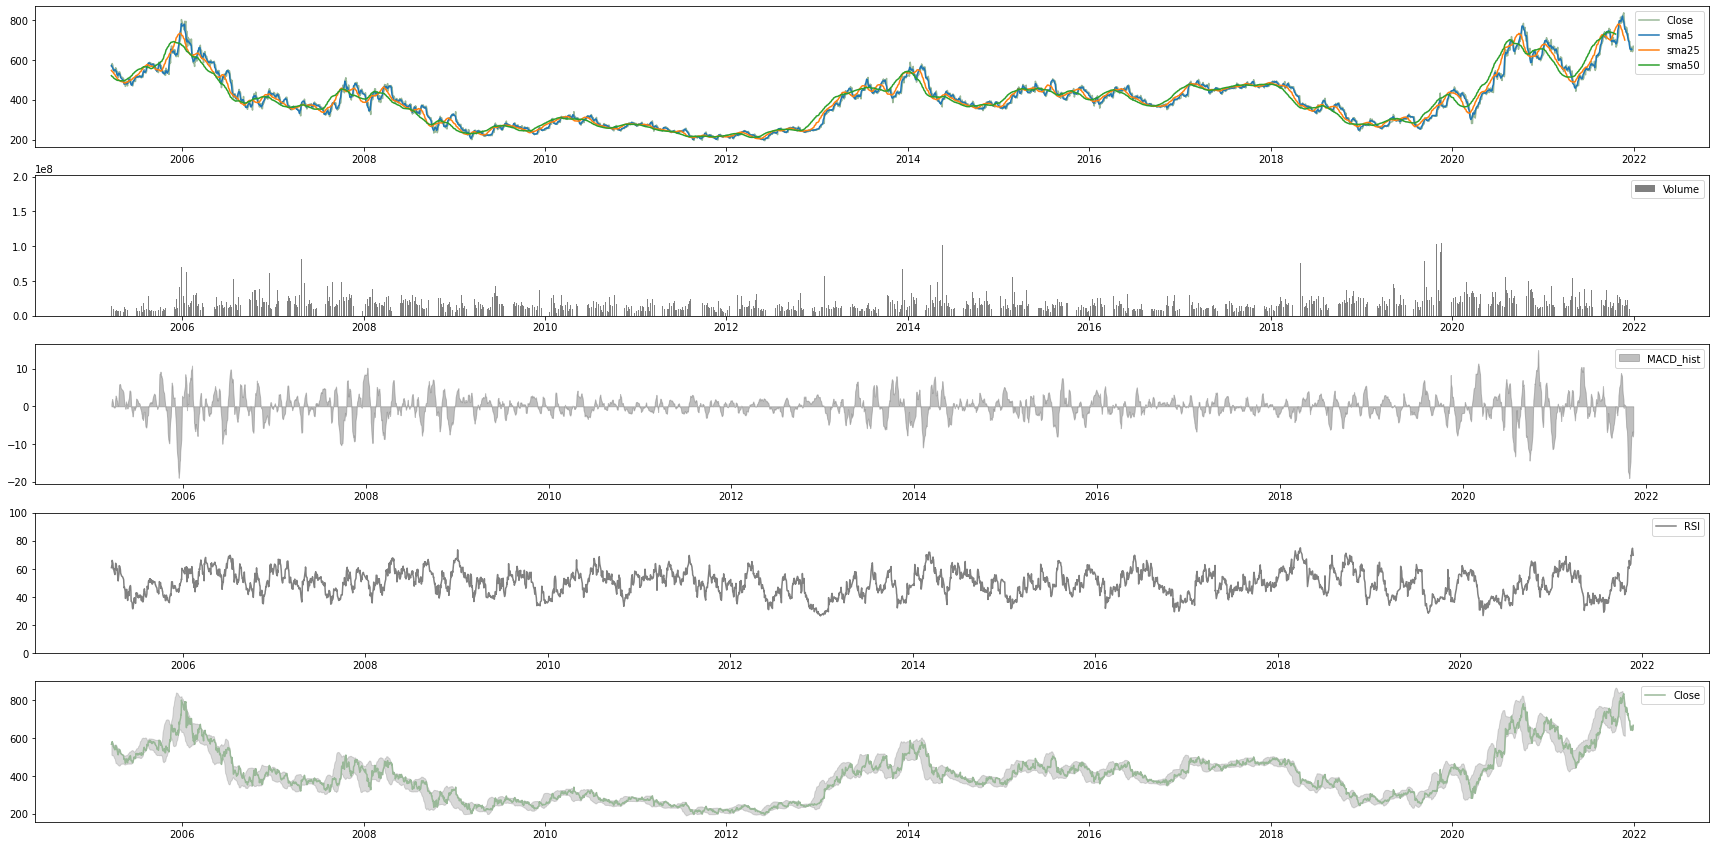

In [20]:
plt.figure(figsize=(30, 15))
plt.subplot(5,1,1)

# 移動平均
plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma5'],label='sma5')
plt.plot(date,df['sma25'],label='sma25')
plt.plot(date,df['sma50'],label='sma50')
plt.legend()

# 出来高
plt.subplot(5,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

# MACD
plt.subplot(5,1,3)
plt.fill_between(date, df['macdhist'], color = 'grey', alpha = 0.5, label='MACD_hist')
# plt.hlines(0, start, end, "grey", linestyles="dashed")
plt.legend()

# RSI
plt.subplot(5,1,4)
plt.plot(date,df['RSI'],label='RSI',color='grey')
plt.ylim(0, 100)
# plt.hlines([30, 50, 70], start, end, 'grey', linestyles='dashed')
plt.legend()

# ボリンジャーバンド
plt.subplot(5,1,5)
plt.plot(date, close, label = 'Close', color='#99b898')
plt.fill_between(date, df['upper'], df['lower'], color='grey', alpha=0.3)
plt.legend()

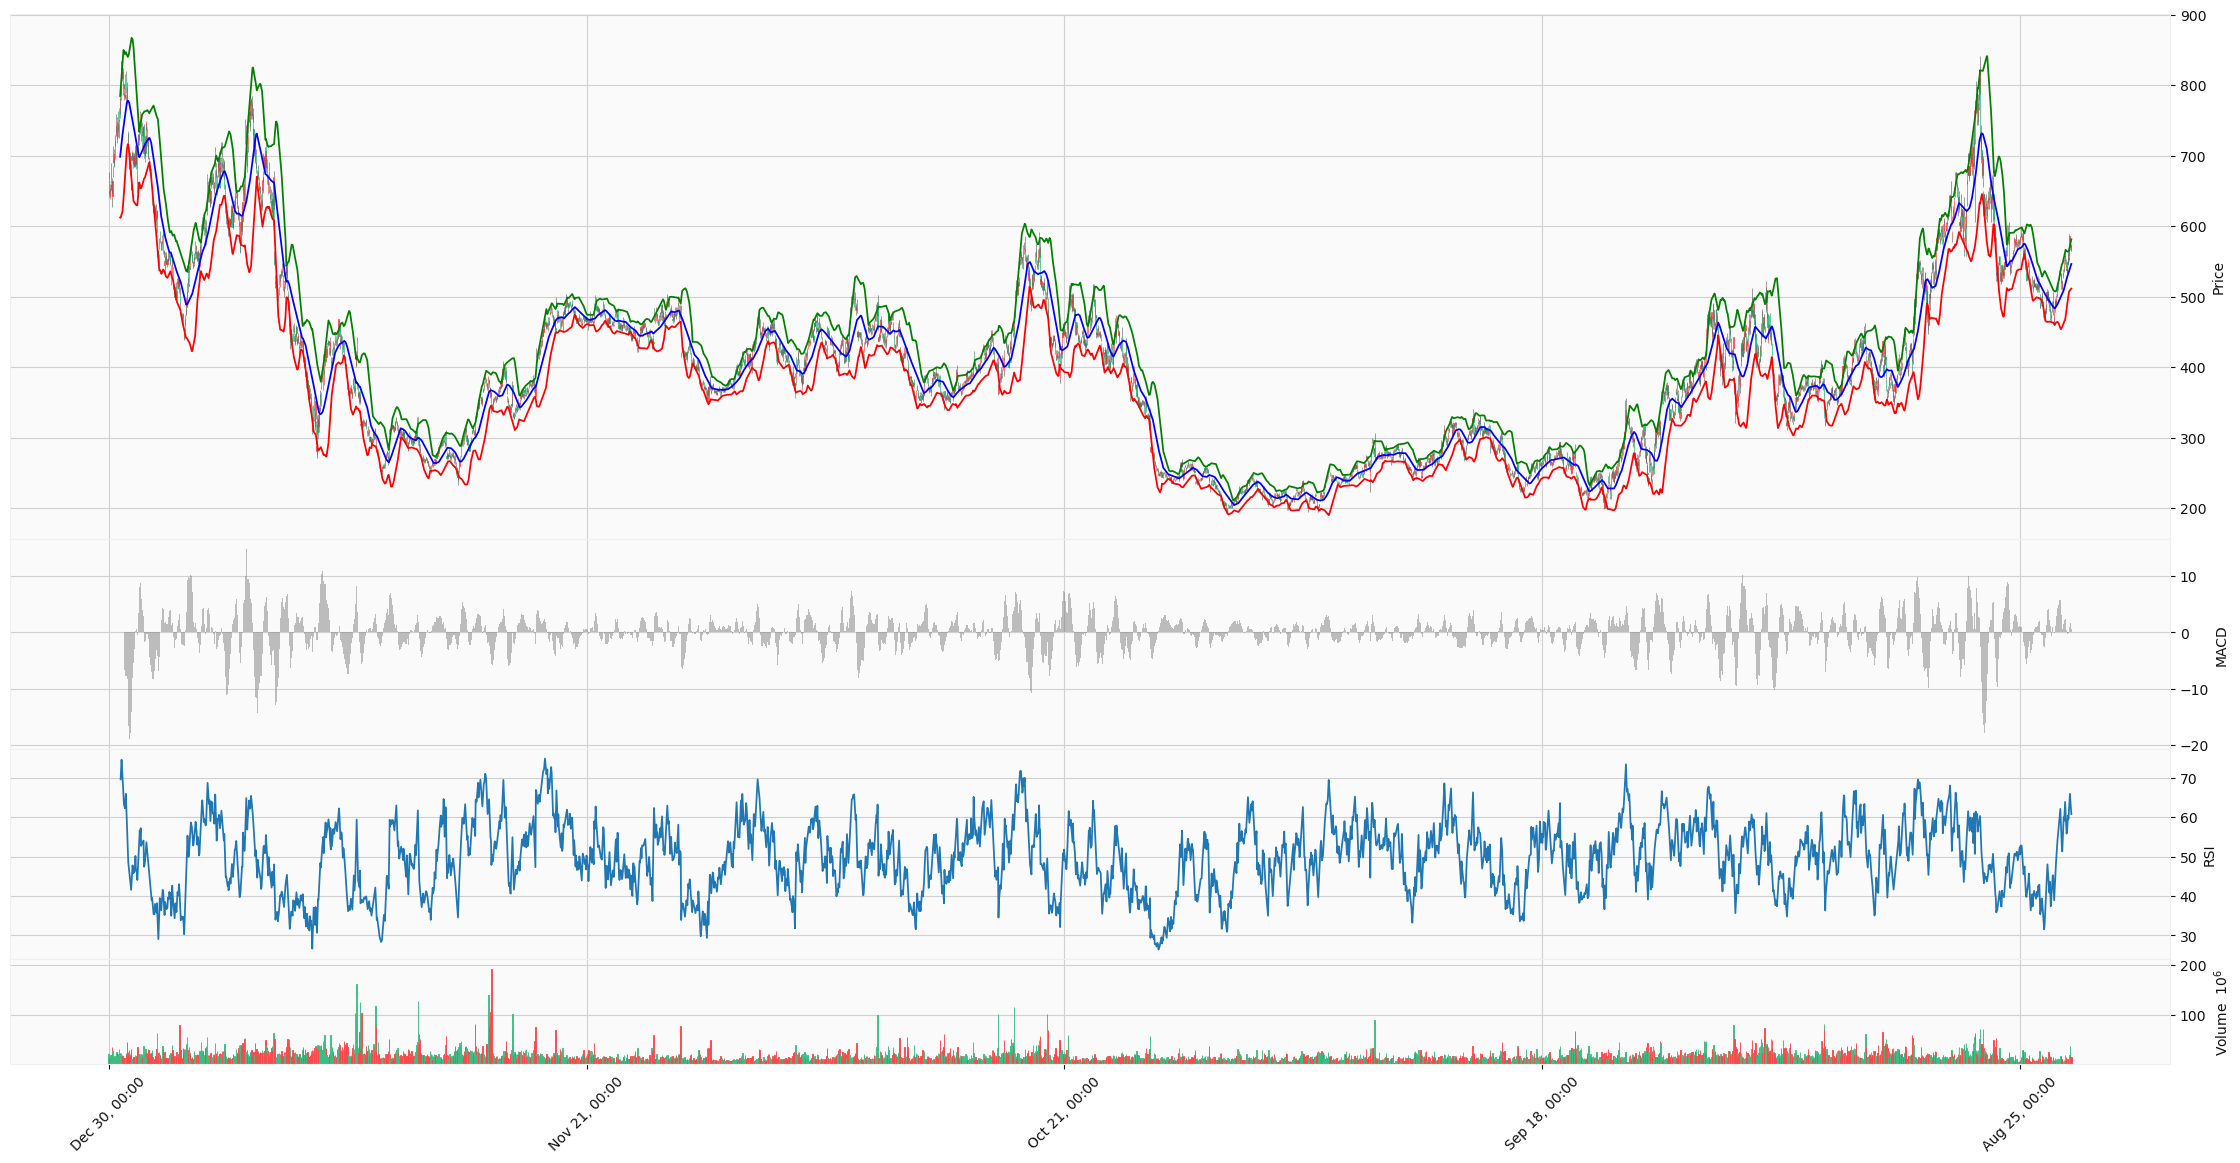

In [21]:
apds = [mpf.make_addplot(df['upper'], color='g'),
        mpf.make_addplot(df['middle'], color='b'),
        mpf.make_addplot(df['lower'], color='r'),
        mpf.make_addplot(df['macdhist'], type='bar', color='gray',
                         width=1.0, panel=1, alpha=0.5, ylabel='MACD'),
        mpf.make_addplot(df['RSI'], panel=2, type='line', ylabel='RSI'),
       ]

mpf.plot(df, type='candle', figsize=(30, 15), style='yahoo', volume=True,
         addplot = apds, volume_panel=3, panel_ratios=(5,2,2,1))

In [22]:
df.tail()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,
2005-03-28,586.38,588.58,557.61,570.88,18962973,557.166,538.8452,514.0608,12.834176,11.896647,0.937529,63.824273,569.331178,538.8452,508.359222
2005-03-25,577.54,583.05,573.09,580.85,37678290,563.584,541.5452,516.0746,14.316913,12.380700,1.936213,65.945413,574.386310,541.5452,508.704090
2005-03-24,570.88,571.98,566.47,568.68,15077282,566.240,543.4924,517.5352,14.344620,12.773484,1.571136,61.369981,576.762634,543.4924,510.222166
2005-03-23,568.68,573.09,565.36,569.77,15162243,569.558,545.1296,518.8406,14.289807,13.076749,1.213058,61.618429,579.368728,545.1296,510.890472
2005-03-22,567.57,575.31,566.47,567.57,14303578,571.550,546.5020,520.0578,13.908517,13.243102,0.665415,60.796352,581.470749,546.5020,511.533251


In [23]:
df.head()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,
2021-12-30,646.9,677.0,645.7,667.4,21235600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-29,644.0,649.6,641.9,645.9,7257200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-28,649.2,654.6,643.6,644.0,12849300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-27,656.0,659.5,638.3,640.2,16486400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-24,663.1,690.1,661.7,663.4,18055500,652.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df2 = df[(df.index>='2021-01-01 00:00:00') & (df.index<='2022-01-01 00:00:00')]

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2021-12-30 to 2021-01-04
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        245 non-null    float64
 1   High        245 non-null    float64
 2   Low         245 non-null    float64
 3   Close       245 non-null    float64
 4   Volume      245 non-null    int64  
 5   sma5        241 non-null    float64
 6   sma25       221 non-null    float64
 7   sma50       196 non-null    float64
 8   macd        212 non-null    float64
 9   macdsignal  212 non-null    float64
 10  macdhist    212 non-null    float64
 11  RSI         220 non-null    float64
 12  upper       221 non-null    float64
 13  middle      221 non-null    float64
 14  lower       221 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 30.6 KB


In [26]:
date2=df2.index
close = df2['Close']

# 移動平均を作成(加重移動平均と指数平滑移動平均は今回は作成しない)
span5 = 5 # 5日移動平均
span25 = 25 # 25日移動平均
span50 = 50 # 50日移動平均

df2['sma5'] = close.rolling(window=span5).mean() # min or max or mean
df2['sma25'] = close.rolling(window=span25).mean()
df2['sma50'] = close.rolling(window=span50).mean()

# MACD（トレンドの指標を見る）
df2['macd'], df2['macdsignal'], df2['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

# RSI（売られすぎ・買われすぎの判断材料）
df2['RSI'] = ta.RSI(close, timeperiod=span25)

# ボリンジャーバンド（プラスナイナスの標準偏差の2倍を使用:基本的にはボリンジャーバンドに収まるが、治らない場合はRSI）
df2['upper'], df2['middle'], df2['lower'] = ta.BBANDS(close, timeperiod=span25, nbdevdn=2, matype=0)

# candle
df2_candle = df2[['High', 'Low', 'Open', 'Close', 'Volume']]

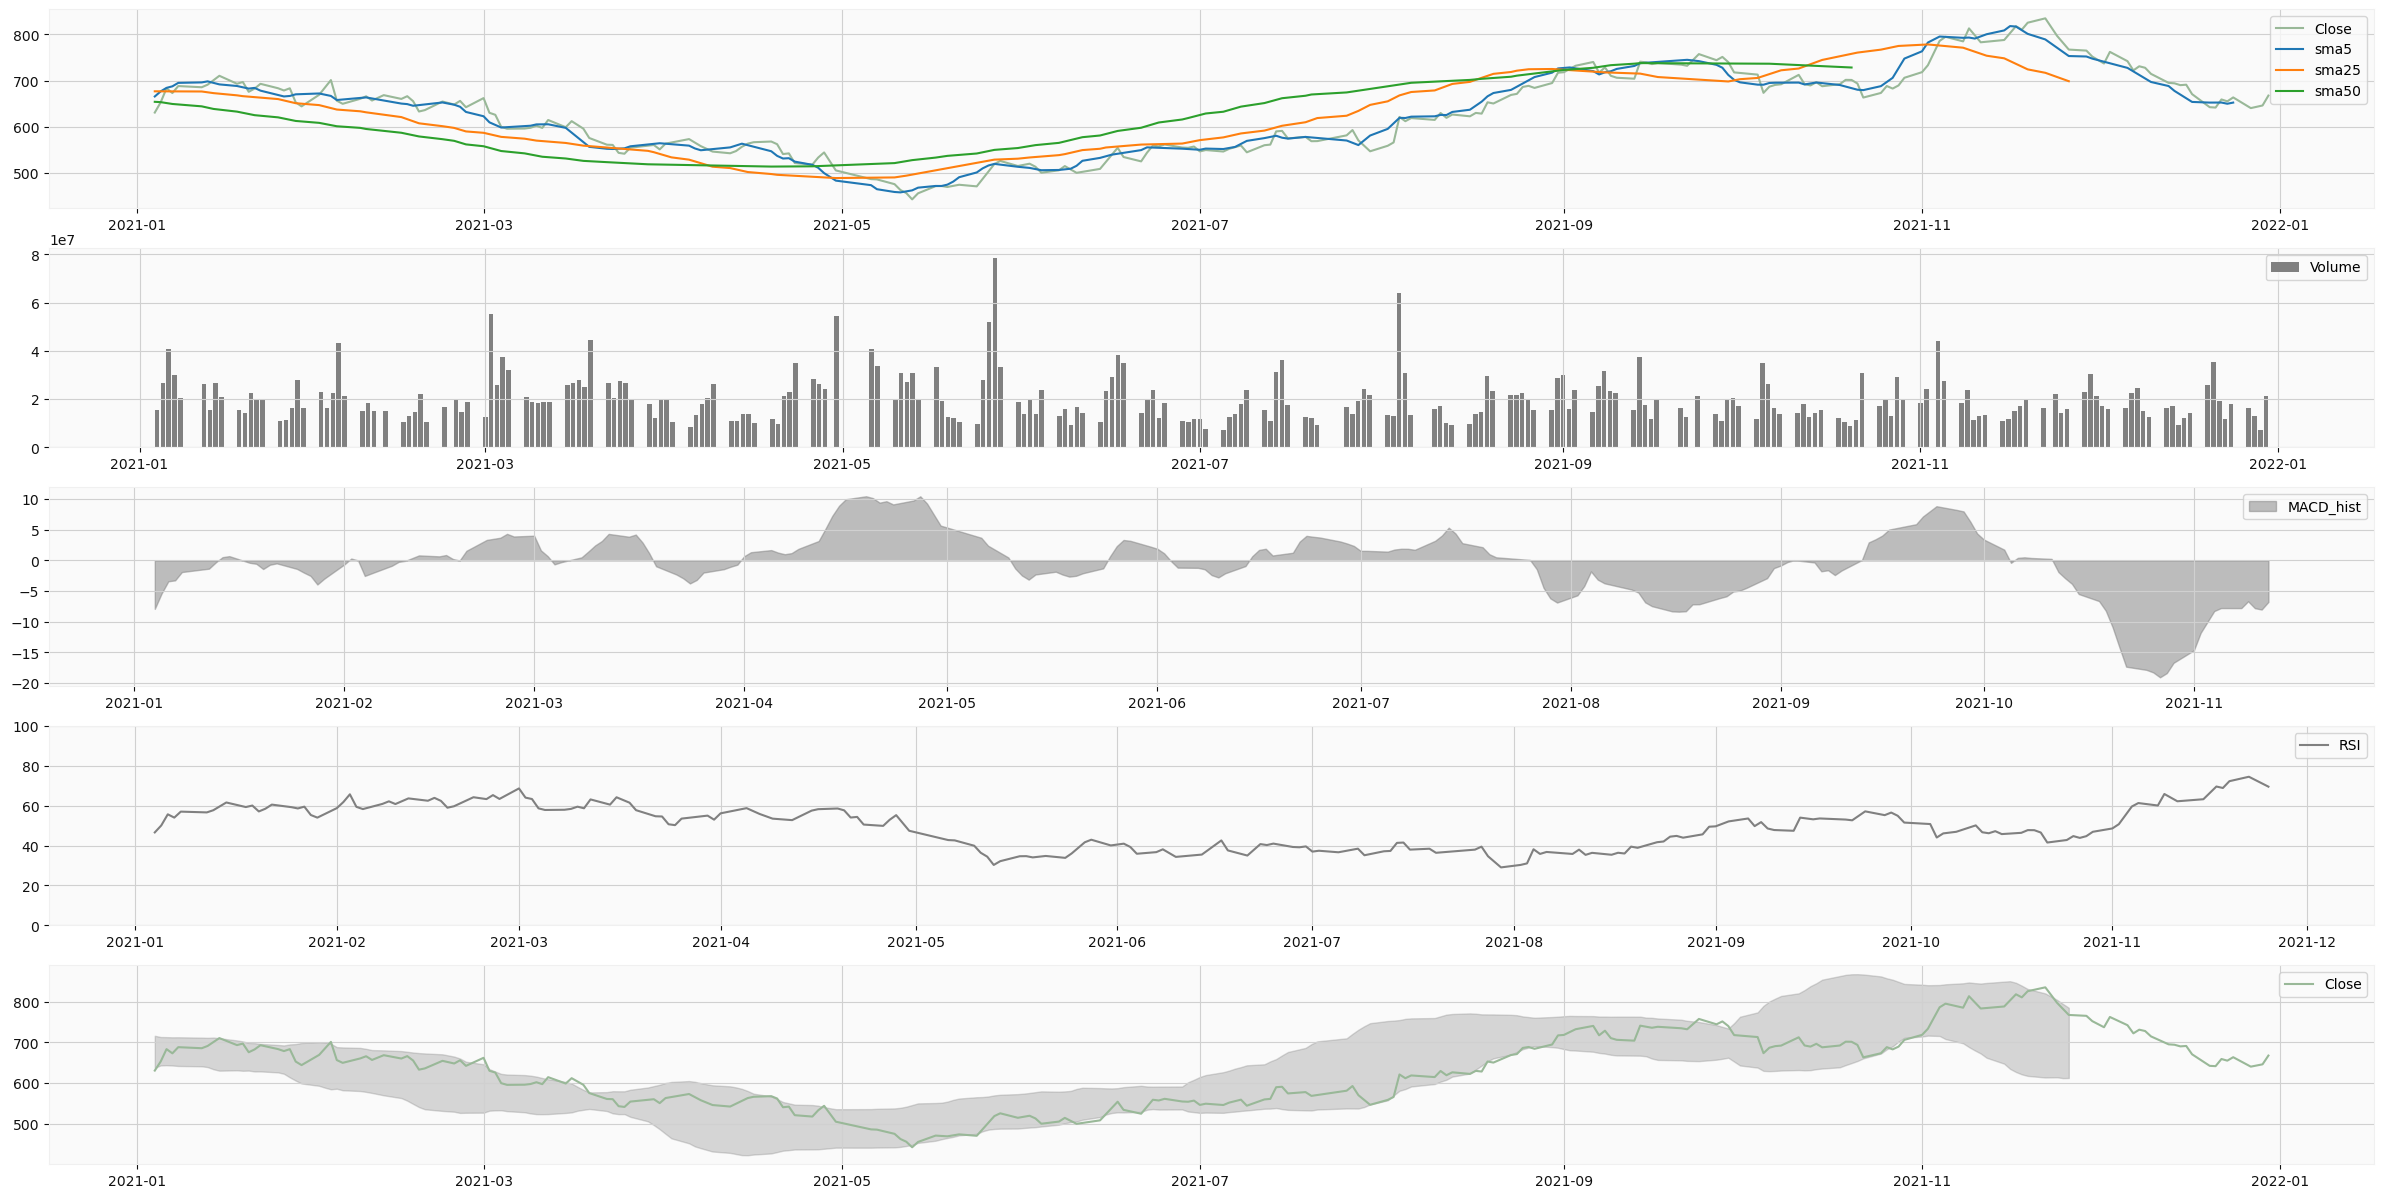

In [28]:
plt.figure(figsize=(30, 15))
plt.subplot(5,1,1)

# 移動平均
plt.plot(date2,close,label='Close',color='#99b898')
plt.plot(date2,df2['sma5'],label='sma5')
plt.plot(date2,df2['sma25'],label='sma25')
plt.plot(date2,df2['sma50'],label='sma50')
plt.legend()

# 出来高
plt.subplot(5,1,2)
plt.bar(date2,df2['Volume'],label='Volume',color='grey')
plt.legend()

# MACD
plt.subplot(5,1,3)
plt.fill_between(date2, df2['macdhist'], color = 'grey', alpha = 0.5, label='MACD_hist')
# plt.hlines(0, '2021-01-01', '2022-01-01', "grey", linestyles="dashed")
plt.legend()

# RSI
plt.subplot(5,1,4)
plt.plot(date2,df2['RSI'],label='RSI',color='grey')
plt.ylim(0, 100)
# plt.hlines([30, 50, 70], '2021-01-01', '2022-01-01', 'grey', linestyles='dashed')
plt.legend()

# ボリンジャーバンド
plt.subplot(5,1,5)
plt.plot(date2, close, label = 'Close', color='#99b898')
plt.fill_between(date2, df2['upper'], df2['lower'], color='grey', alpha=0.3)
plt.legend()

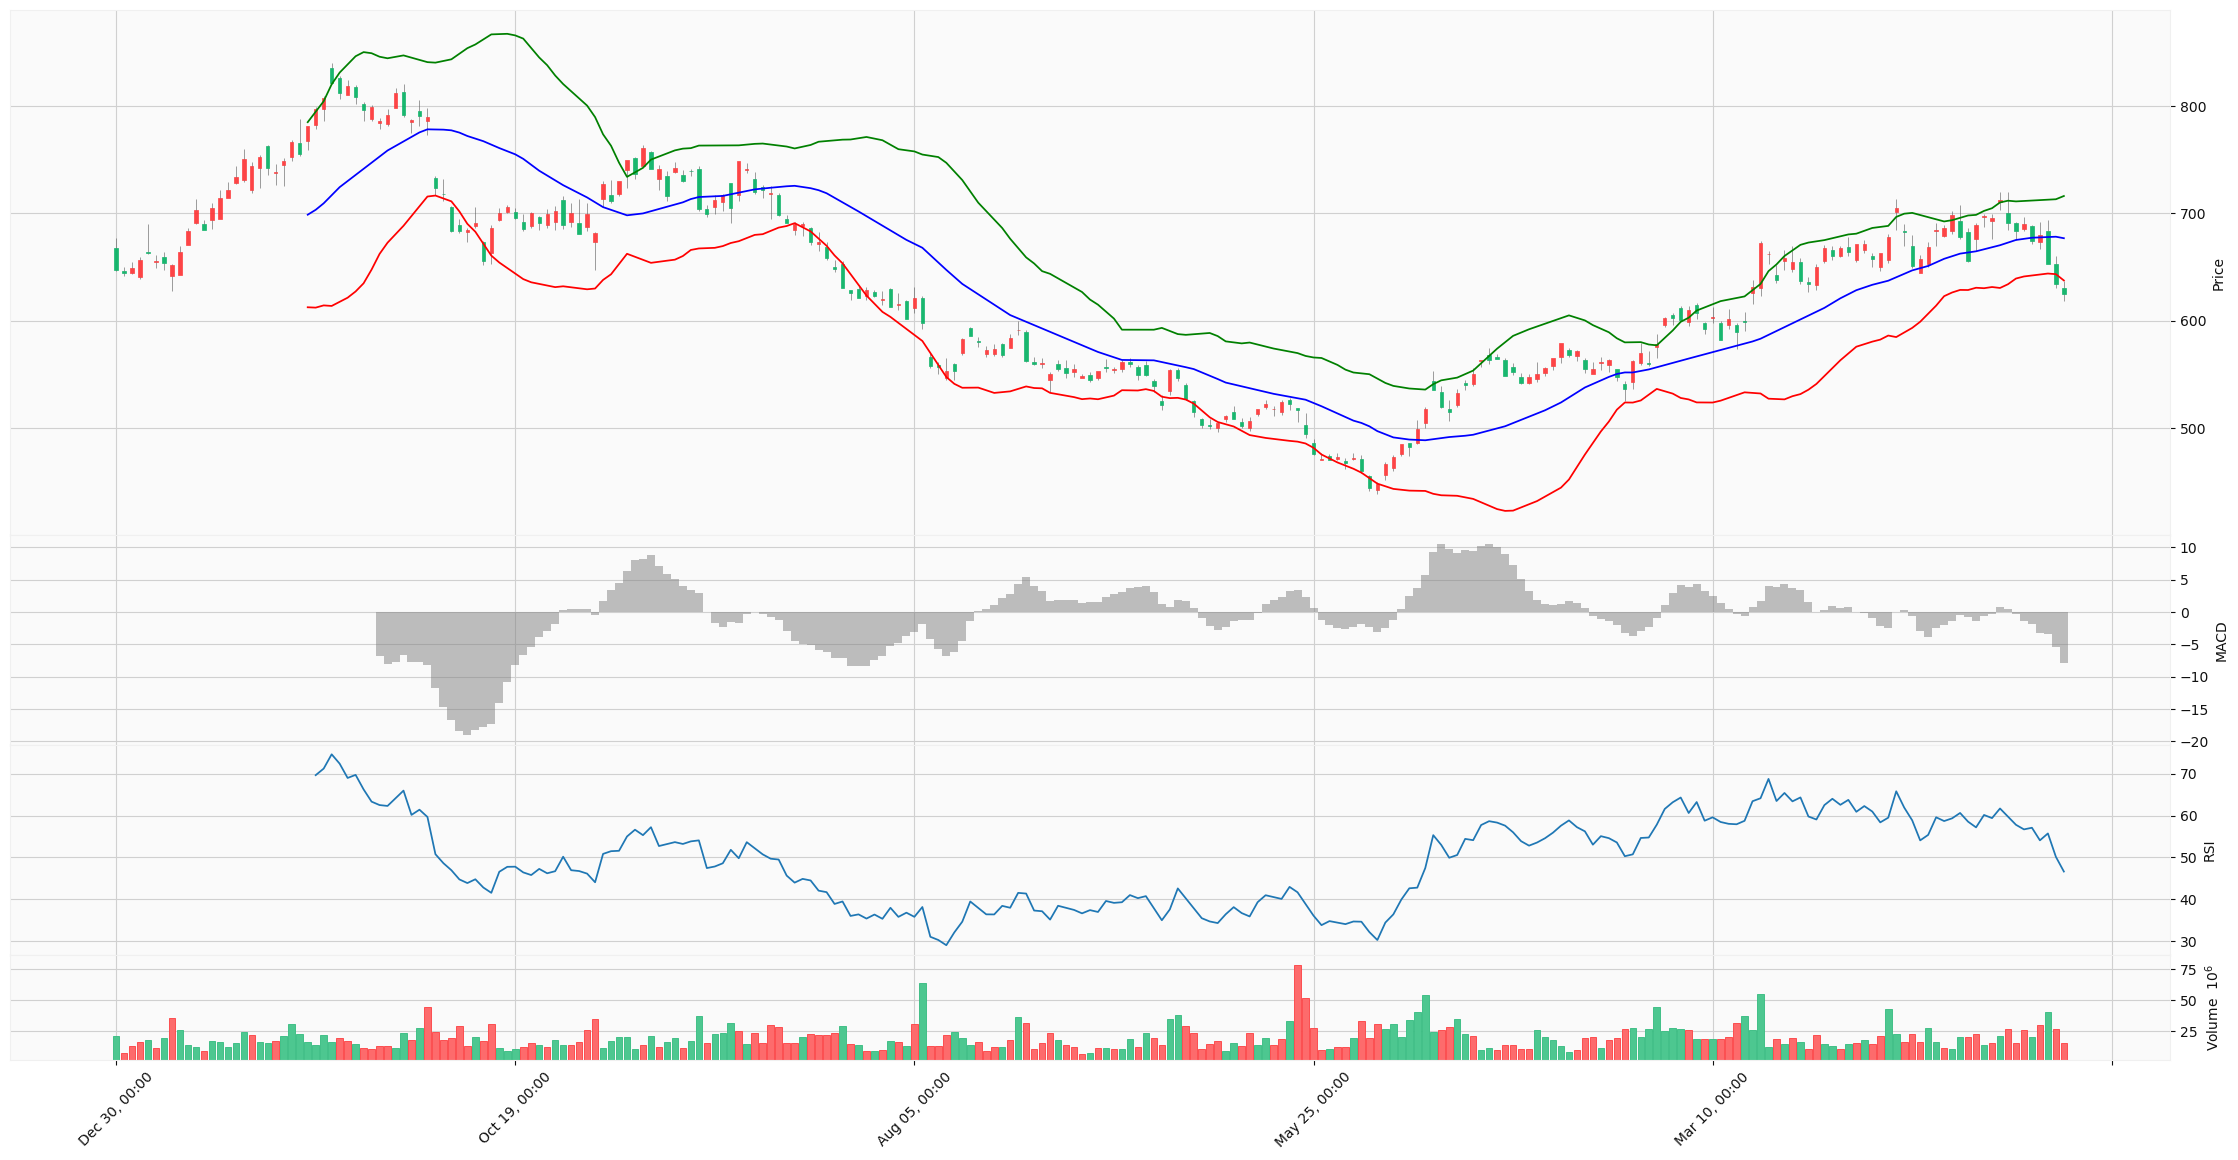

In [29]:
apds = [mpf.make_addplot(df2['upper'], color='g'),
        mpf.make_addplot(df2['middle'], color='b'),
        mpf.make_addplot(df2['lower'], color='r'),
        mpf.make_addplot(df2['macdhist'], type='bar', color='gray',
                         width=1.0, panel=1, alpha=0.5, ylabel='MACD'),
        mpf.make_addplot(df2['RSI'], panel=2, type='line', ylabel='RSI'),
       ]

mpf.plot(df2, type='candle', figsize=(30, 15), style='yahoo', volume=True,
         addplot = apds, volume_panel=3, panel_ratios=(5,2,2,1))

In [30]:
high =df2['High']
low = df2['Low']

max26 = high.rolling(window=26).max()
min26 = low.rolling(window=26).min()

df2['basic_line'] = (max26 + min26) / 2

In [31]:
df2.tail()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower,basic_line
Date,,,,,,,,,,,,,,,,
2021-01-08,674.48,688.54,671.71,688.05,20671721,694.960,677.1368,646.9244,13.582768,15.478613,-1.895845,57.091267,712.382502,677.1368,641.891098,681.960
2021-01-07,680.03,691.81,666.36,672.90,29841939,687.474,677.6476,649.1760,11.417667,14.666424,-3.248757,54.085063,712.257005,677.6476,643.038195,681.960
2021-01-06,653.00,693.30,652.60,683.20,40851896,684.128,678.2420,651.6236,10.412898,13.815719,-3.402820,55.735715,712.701677,678.2420,643.782323,681.960
2021-01-05,633.69,660.03,630.42,652.60,26494433,676.444,678.0796,653.1682,7.065996,12.465774,-5.399778,50.155706,712.980037,678.0796,643.179163,675.225
2021-01-04,624.28,636.36,618.54,630.52,15485889,665.454,676.6696,653.8672,2.601887,10.492997,-7.891110,46.645614,716.011059,676.6696,637.328141,669.285


In [32]:
# 転換線
high9 = high.rolling(window=9).max()
low9 = low.rolling(window=9).min()

df2['turn_line'] = (high9 + low9) / 2


In [33]:
df2.tail()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower,basic_line,turn_line
Date,,,,,,,,,,,,,,,,,
2021-01-08,674.48,688.54,671.71,688.05,20671721,694.960,677.1368,646.9244,13.582768,15.478613,-1.895845,57.091267,712.382502,677.1368,641.891098,681.960,687.305
2021-01-07,680.03,691.81,666.36,672.90,29841939,687.474,677.6476,649.1760,11.417667,14.666424,-3.248757,54.085063,712.257005,677.6476,643.038195,681.960,692.455
2021-01-06,653.00,693.30,652.60,683.20,40851896,684.128,678.2420,651.6236,10.412898,13.815719,-3.402820,55.735715,712.701677,678.2420,643.782323,681.960,686.315
2021-01-05,633.69,660.03,630.42,652.60,26494433,676.444,678.0796,653.1682,7.065996,12.465774,-5.399778,50.155706,712.980037,678.0796,643.179163,675.225,675.225
2021-01-04,624.28,636.36,618.54,630.52,15485889,665.454,676.6696,653.8672,2.601887,10.492997,-7.891110,46.645614,716.011059,676.6696,637.328141,669.285,669.285


In [34]:
# 先行スパン1
df2['sspan1'] = (df2['basic_line'] + df2['turn_line']) / 2

In [35]:
# 先行スパン2
high52 = high.rolling(window=52).max()
low52 = low.rolling(window=52).min()

df2['sspan2'] = (high52 + low52) / 2

In [36]:
df2.tail()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower,basic_line,turn_line,sspan1,sspan2
Date,,,,,,,,,,,,,,,,,,,
2021-01-08,674.48,688.54,671.71,688.05,20671721,694.960,677.1368,646.9244,13.582768,15.478613,-1.895845,57.091267,712.382502,677.1368,641.891098,681.960,687.305,684.6325,622.550
2021-01-07,680.03,691.81,666.36,672.90,29841939,687.474,677.6476,649.1760,11.417667,14.666424,-3.248757,54.085063,712.257005,677.6476,643.038195,681.960,692.455,687.2075,628.245
2021-01-06,653.00,693.30,652.60,683.20,40851896,684.128,678.2420,651.6236,10.412898,13.815719,-3.402820,55.735715,712.701677,678.2420,643.782323,681.960,686.315,684.1375,638.935
2021-01-05,633.69,660.03,630.42,652.60,26494433,676.444,678.0796,653.1682,7.065996,12.465774,-5.399778,50.155706,712.980037,678.0796,643.179163,675.225,675.225,675.2250,638.935
2021-01-04,624.28,636.36,618.54,630.52,15485889,665.454,676.6696,653.8672,2.601887,10.492997,-7.891110,46.645614,716.011059,676.6696,637.328141,669.285,669.285,669.2850,642.550


In [37]:
df2['slow_line'] = df2['Close'].shift(-25)

In [38]:
df2.head()

,Open,High,Low,Close,Volume,sma5,sma25,sma50,macd,macdsignal,macdhist,RSI,upper,middle,lower,basic_line,turn_line,sspan1,sspan2,slow_line
Date,,,,,,,,,,,,,,,,,,,,
2021-12-30,646.9,677.0,645.7,667.4,21235600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,781.8
2021-12-29,644.0,649.6,641.9,645.9,7257200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,797.0
2021-12-28,649.2,654.6,643.6,644.0,12849300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,835.0
2021-12-27,656.0,659.5,638.3,640.2,16486400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,825.5
2021-12-24,663.1,690.1,661.7,663.4,18055500,652.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810.4


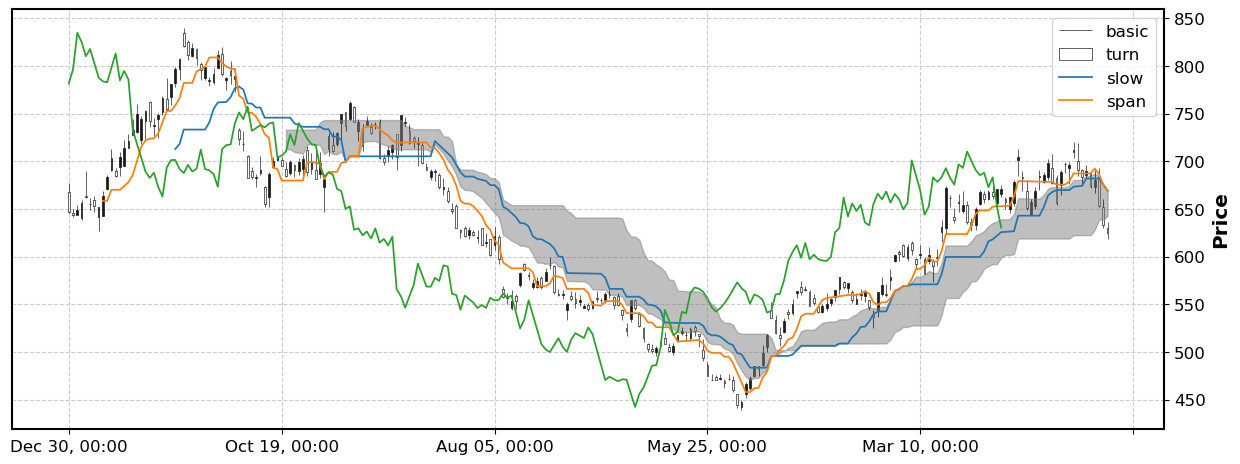

In [39]:
lines = [mpf.make_addplot(df2['basic_line']), # 基準線
         mpf.make_addplot(df2['turn_line']), # 転換線
         mpf.make_addplot(df2['slow_line']), # 遅行線 
        ]

labels = ['basic', 'turn', 'slow', 'span']
fig, ax = mpf.plot(df2, type='candle', figsize=(16,6), style='classic', xrotation=0, addplot=lines, returnfig=True,
                   fill_between=dict(y1=df2['sspan1'].values, y2=df2['sspan2'].values, alpha=0.5, color='gray'))
ax[0].legend(labels)
plt.show()

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


,0
3,4
7,8
